In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import DBSCAN

In [2]:
df = pd.read_csv('/Users/gwagjongtae/머신러닝 발제/Mall_Customers.csv')
df.info()
df.head() #데이터 로드 및 정보 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.describe() #데이터의 평균,분산,사분위 등의 수치

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
df.isnull().sum() #결측치 확인

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
df =pd.get_dummies(df,columns=['Gender']).astype(int)
df # one_hot encoding을 사용하여 범주형 변수를 수치형으로 변환

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0
...,...,...,...,...,...,...
195,196,35,120,79,1,0
196,197,45,126,28,1,0
197,198,32,126,74,0,1
198,199,32,137,18,0,1


In [6]:
columns_to_scale = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
df[columns_to_scale] = Scaler.fit_transform(df[columns_to_scale])
print(df.head()) # 이미 0~1로 되어있는 Gender 변수를 제외한 나머지 변수 스케일링

   CustomerID       Age  Annual Income (k$)  Spending Score (1-100)  \
0           1 -1.424569           -1.738999               -0.434801   
1           2 -1.281035           -1.738999                1.195704   
2           3 -1.352802           -1.700830               -1.715913   
3           4 -1.137502           -1.700830                1.040418   
4           5 -0.563369           -1.662660               -0.395980   

   Gender_Female  Gender_Male  
0              0            1  
1              0            1  
2              1            0  
3              1            0  
4              1            0  


In [7]:
df=df.drop('CustomerID',axis=1)
df # 분석에 불필요한 데이터 삭제

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,-1.424569,-1.738999,-0.434801,0,1
1,-1.281035,-1.738999,1.195704,0,1
2,-1.352802,-1.700830,-1.715913,1,0
3,-1.137502,-1.700830,1.040418,1,0
4,-0.563369,-1.662660,-0.395980,1,0
...,...,...,...,...,...
195,-0.276302,2.268791,1.118061,1,0
196,0.441365,2.497807,-0.861839,1,0
197,-0.491602,2.497807,0.923953,0,1
198,-0.491602,2.917671,-1.250054,0,1


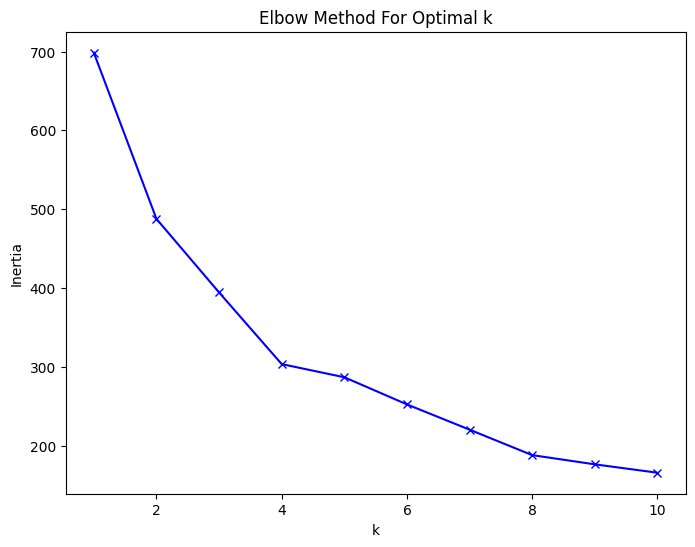

In [8]:
inertias = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show() #엘보우 곡선을 통해 최적의 k값 찾기

In [9]:
kmeans = KMeans(n_clusters=5,random_state=42)
kmeans.fit(df)
df['cluster'] = kmeans.labels_
df #결정된 k값을 사용하여 클러스터링 수행

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male,cluster
0,-1.424569,-1.738999,-0.434801,0,1,2
1,-1.281035,-1.738999,1.195704,0,1,2
2,-1.352802,-1.700830,-1.715913,1,0,2
3,-1.137502,-1.700830,1.040418,1,0,2
4,-0.563369,-1.662660,-0.395980,1,0,2
...,...,...,...,...,...,...
195,-0.276302,2.268791,1.118061,1,0,4
196,0.441365,2.497807,-0.861839,1,0,3
197,-0.491602,2.497807,0.923953,0,1,1
198,-0.491602,2.917671,-1.250054,0,1,3


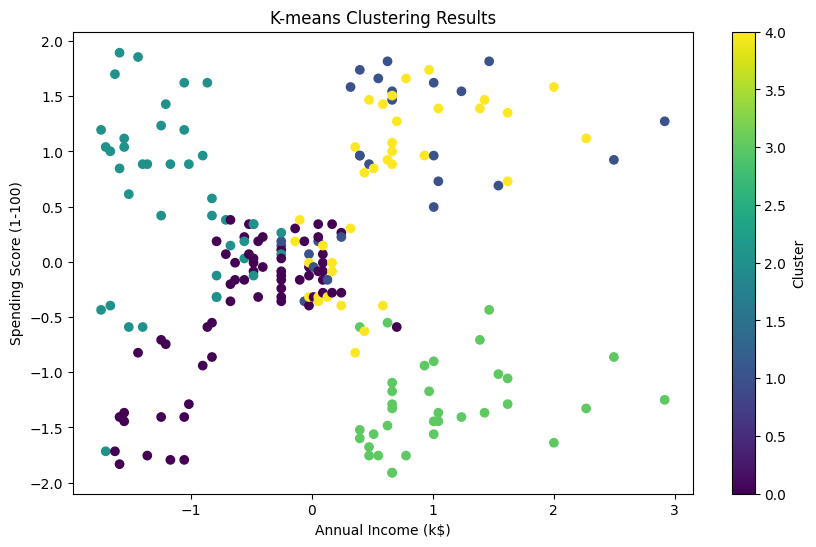

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], 
            c=df['cluster'], cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-means Clustering Results')
plt.colorbar(label='Cluster')
plt.show() #k-means 클러스터링 결과 시각화

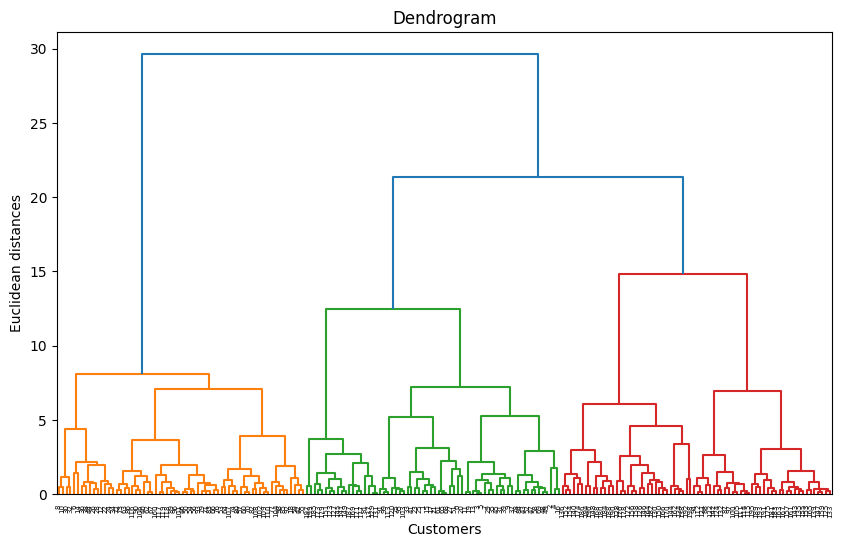

In [11]:
plt.figure(figsize=(10, 6))
dendrogram =sch.dendrogram(sch.linkage(df,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show() #덴드로그램을 통해 최적의 k값 찾기

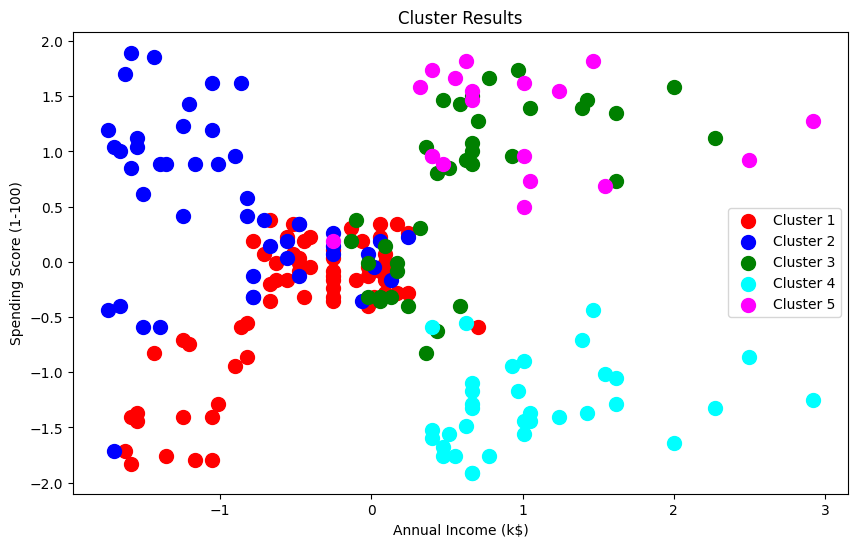

In [12]:
hc = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(df)

plt.figure(figsize=(10, 6))
plt.scatter(df.loc[y_hc == 0, 'Annual Income (k$)'], 
           df.loc[y_hc == 0, 'Spending Score (1-100)'], 
           s=100, c='red', label='Cluster 1')
plt.scatter(df.loc[y_hc == 1, 'Annual Income (k$)'], 
           df.loc[y_hc == 1, 'Spending Score (1-100)'], 
           s=100, c='blue', label='Cluster 2')
plt.scatter(df.loc[y_hc == 2, 'Annual Income (k$)'], 
           df.loc[y_hc == 2, 'Spending Score (1-100)'], 
           s=100, c='green', label='Cluster 3')
plt.scatter(df.loc[y_hc == 3, 'Annual Income (k$)'], 
           df.loc[y_hc == 3, 'Spending Score (1-100)'], 
           s=100, c='cyan', label='Cluster 4')
plt.scatter(df.loc[y_hc == 4, 'Annual Income (k$)'], 
           df.loc[y_hc == 4, 'Spending Score (1-100)'], 
           s=100, c='magenta', label='Cluster 5')

plt.title('Cluster Results')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show() #계층적 군집화 모델 시각화

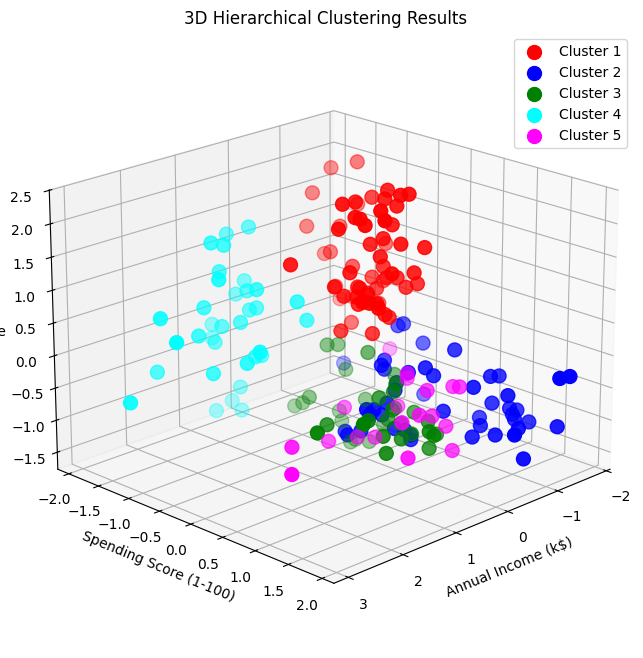

In [13]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

colors = ['red', 'blue', 'green', 'cyan', 'magenta']
for i in range(5):
    cluster_points = df[y_hc == i]
    ax.scatter(cluster_points['Annual Income (k$)'],
              cluster_points['Spending Score (1-100)'],
              cluster_points['Age'],
              c=colors[i],
              s=100,
              label=f'Cluster {i+1}')

ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Spending Score (1-100)')
ax.set_zlabel('Age')

plt.title('3D Hierarchical Clustering Results')

plt.legend()

ax.view_init(elev=20, azim=45)

plt.show()

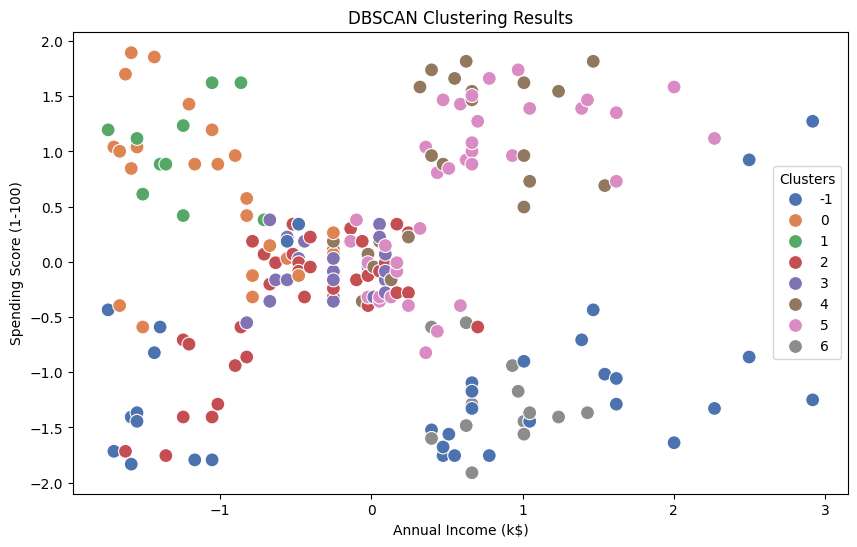

In [14]:
dbscan = DBSCAN(eps=0.9, min_samples=8)
df['Cluster'] = dbscan.fit_predict(df)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df,
                x='Annual Income (k$)',
                y='Spending Score (1-100)',
                hue='Cluster',
                palette='deep',
                s=100)

plt.title('DBSCAN Clustering Results')
plt.legend(title='Clusters')
plt.show() #DBSCAN 모델 시각화

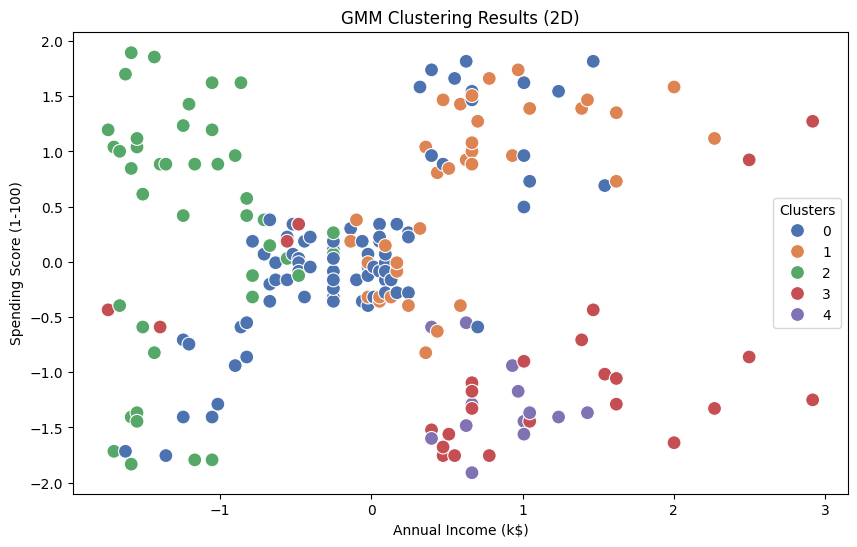

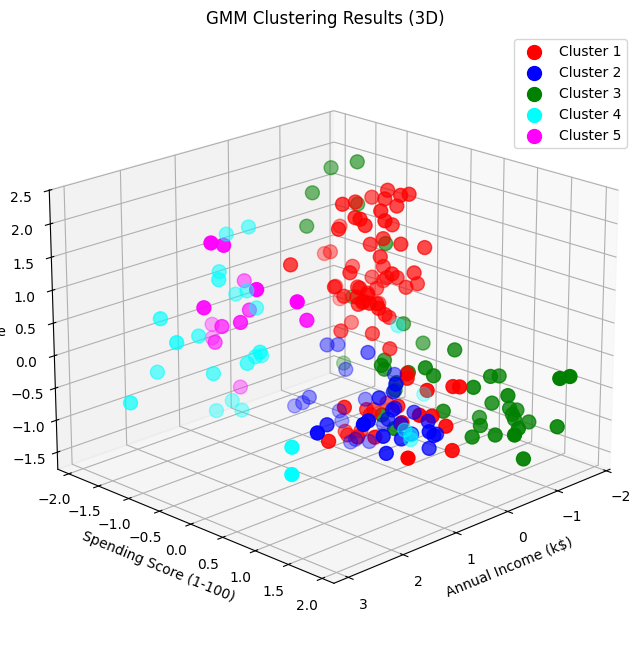


클러스터별 데이터 수:
Cluster
0    81
1    36
2    42
3    27
4    14
Name: count, dtype: int64


In [15]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=5, random_state=42)
df['Cluster'] = gmm.fit_predict(df)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df,
                x='Annual Income (k$)',
                y='Spending Score (1-100)',
                hue='Cluster',
                palette='deep',
                s=100)

plt.title('GMM Clustering Results (2D)')
plt.legend(title='Clusters')
plt.show()

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

colors = ['red', 'blue', 'green', 'cyan', 'magenta']
for i in range(5):
    cluster_points = df[df['Cluster'] == i]
    ax.scatter(cluster_points['Annual Income (k$)'],
              cluster_points['Spending Score (1-100)'],
              cluster_points['Age'],
              c=colors[i],
              s=100,
              label=f'Cluster {i+1}')

ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Spending Score (1-100)')
ax.set_zlabel('Age')

plt.title('GMM Clustering Results (3D)')
plt.legend()
ax.view_init(elev=20, azim=45)
plt.show()

print("\n클러스터별 데이터 수:")
print(df['Cluster'].value_counts().sort_index()) #gmm 모델 클러스터별 데이터 수